In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('endowment_data_2018_followers.csv')
data.shape

(232, 8)

In [3]:
university = data.iloc[:,0]
nu_data = data.iloc[:,1:]

In [4]:
scale_data = preprocessing.scale(nu_data)

In [5]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [6]:
pca = PCA(n_components=3)
f_data = pca.fit(scale_data)
p_data = pca.transform(scale_data)

In [7]:
fig1, ax = plt.subplots()
x1 = p_data[:,0]
y1 = p_data[:,1]
ax.scatter(x1, y1, 5, c=(1,0,0), alpha = 0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Biplot')
for i, text in enumerate(university):
    ax.annotate(text, (x1[i], y1[i]), fontsize=7, alpha = 0.7)

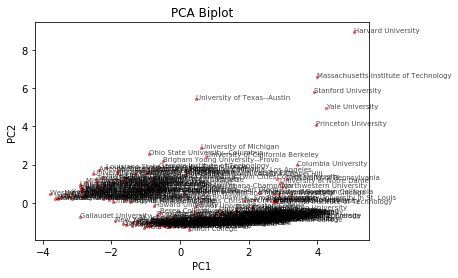

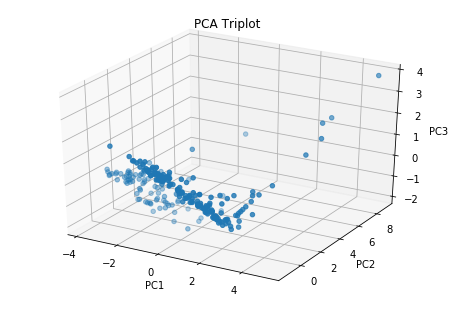

In [8]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.scatter(p_data[:,0], p_data[:,1], p_data[:,2])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('PCA Triplot')

plt.show()

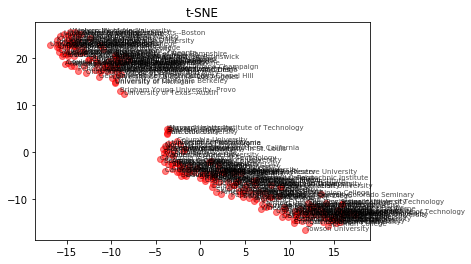

In [9]:
fig, ax = plt.subplots()
tsne = TSNE(n_components=2, init='pca', random_state=0)
Y = tsne.fit_transform(scale_data)
x = Y[:,0]
y = Y[:,1]
ax.scatter(x, y, c=(1,0,0), alpha = 0.5)
ax.set_title('t-SNE')
for i, text in enumerate(university):
    ax.annotate(text, (x[i], y[i]), fontsize=7, alpha = 0.7)

plt.show()

In [10]:
data['Followers'].describe()

count       232.000000
mean      63759.422414
std      109187.852196
min         315.000000
25%        8892.750000
50%       24804.000000
75%       81161.500000
max      941853.000000
Name: Followers, dtype: float64

In [11]:
data['label'] = np.nan

In [12]:
for index, row in data.iterrows():
    if data.loc[index, 'Followers'] <= 12100:
        data.loc[index, 'label'] = 'small'
    elif data.loc[index,'Followers'] > 54000:
        data.loc[index, 'label'] = 'large'
    else:
        data.loc[index, 'label'] = 'medium'

In [13]:
data

,university,endowment average (K),graduation rate,SAT_avg,accept_ratio,tuition,Public or private,Followers,label
0,Harvard University,35495355.0,0.86,1497,0.05,48949,0,847539,large
1,University of Texas--Austin,29041575.0,0.55,1297,0.40,10136,1,208091,large
2,Yale University,25490350.0,0.86,1498,0.06,51400,0,401072,large
3,Princeton University,22438026.5,0.89,1490,0.07,47140,0,309605,large
4,Stanford University,22310543.5,0.75,1479,0.05,49617,0,604868,large
5,Brigham Young University--Provo,15350000.0,0.29,1290,0.51,5460,0,60222,large
6,Massachusetts Institute of Technology,13328129.0,0.84,1507,0.08,49892,0,941853,large
7,University of Pennsylvania,10424466.5,0.85,1457,0.09,53534,0,120188,large
8,Northwestern University,9920767.0,0.84,1460,0.11,52678,0,53330,medium
9,University of Michigan,9847787.0,0.76,1384,0.29,14826,1,203010,large


In [14]:
from collections import Counter
Counter(data['label'])

Counter({'large': 77, 'medium': 78, 'small': 77})

Endowment&Followers

Split data

In [15]:
from sklearn.cross_validation import train_test_split
label = data['label']
en_data = data.iloc[:,1:7]
scaled_data = preprocessing.scale(en_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, label, test_size=0.4, random_state=0)

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.tree import ExtraTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [17]:
# six classification measures
import numpy as np 
import math

def compute_measure(predicted_label,true_label):
    t_idx = (predicted_label == true_label)# truely predicted
    f_idx = np.logical_not(t_idx)# falsely predicted
    
    p_idx = (true_label > 0) #positive targets
    n_idx = np.logical_not(p_idx)#negative targets
    tp = np.sum(np.logical_and(t_idx,p_idx))# TP
    tn = np.sum(np.logical_and(t_idx,n_idx))# TN
    # false positive:original negative but classified as postive
    #false negative:original positive but classified as negative
    fp = np.sum(n_idx)-tn
    fn = np.sum(p_idx)-tp
    tp_fp_tn_list = []
    tp_fp_tn_list.append(tp)
    tp_fp_tn_list.append(fp)
    tp_fp_tn_list.append(tn)
    tp_fp_tn_list.append(fn)
    tp_fp_tn_list = np.array(tp_fp_tn_list)
    tp = tp_fp_tn_list[0]
    fp = tp_fp_tn_list[1]
    tn = tp_fp_tn_list[2]
    fn = tp_fp_tn_list[3]
    
    with np.errstate(divide = 'ignore'):
        sen = (1.0*tp)/(tp+fn)
    with np.errstate(divide = 'ignore'):
        spc = (1.0*tn)/(tn+fp)
    with np.errstate(divide = 'ignore'):
        ppr = float(1.0*tp)/(float(tp)+float(fp))
    with np.errstate(divide = 'ignore'):
        npr = (1.0*tn)/(tn+fn)
    
        F1_score = float(2*tp)/(2*tp+fp+fn)
        acc = (tp+tn)*1.0/(tp+fp+tn+fn)
        d = math.log((1+acc),2.0)+math.log((1+(sen+spc)/2),2.0)
        
        ans=[]
        ans.append(acc)
        ans.append(sen)
        ans.append(spc)
        ans.append(ppr)
        ans.append(npr)
        ans.append(F1_score)
        ans.append(d)
    return ans

Extra-Tree Model

In [18]:
X = X_train
y = y_train
ert = ExtraTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto')
ert.fit(X, y)
ert_predicted_label=ert.predict(X_test)

In [19]:
import numpy as np 
import math

def nonspc_compute_measure(predicted_label,true_label):
    t_idx = (predicted_label == true_label)# truely predicted
    f_idx = np.logical_not(t_idx)# falsely predicted
    
    p_idx = (true_label > 0) #positive targets
    n_idx = np.logical_not(p_idx)#negative targets
    tp = np.sum(np.logical_and(t_idx,p_idx))# TP
    tn = np.sum(np.logical_and(t_idx,n_idx))# TN
    # false positive:original negative but classified as postive
    #false negative:original positive but classified as negative
    fp = np.sum(n_idx)-tn
    fn = np.sum(p_idx)-tp
    tp_fp_tn_list = []
    tp_fp_tn_list.append(tp)
    tp_fp_tn_list.append(fp)
    tp_fp_tn_list.append(tn)
    tp_fp_tn_list.append(fn)
    tp_fp_tn_list = np.array(tp_fp_tn_list)
    tp = tp_fp_tn_list[0]
    fp = tp_fp_tn_list[1]
    tn = tp_fp_tn_list[2]
    fn = tp_fp_tn_list[3]
    
    with np.errstate(divide = 'ignore'):
        sen = (1.0*tp)/(tp+fn)
#    with np.errstate(divide = 'ignore'):
#        spc = (1.0*tn)/(tn+fp)
    with np.errstate(divide = 'ignore'):
        ppr = float(1.0*tp)/(float(tp)+float(fp))
    with np.errstate(divide = 'ignore'):
        npr = (1.0*tn)/(tn+fn)
    
        F1_score = float(2*tp)/(2*tp+fp+fn)
        acc = (tp+tn)*1.0/(tp+fp+tn+fn)
        d = math.log((1+acc),2.0)+math.log((1+(sen+0)/2),2.0)
        
        ans=[]
        ans.append(acc)
        ans.append(sen)
#        ans.append(spc)
        ans.append(ppr)
        ans.append(npr)
        ans.append(F1_score)
        ans.append(d)
    return ans

In [20]:
ans = nonspc_compute_measure(ert_predicted_label,y_test)
print('This is the accuracy of Extra-Tree model:  '+ str(ans[0]))
print('This is the sensitivy of Extra-Tree model:  '+ str(ans[1]))
#print('This is the specificity of Extra-Tree model: '+ str(ans[2]))
print('This is the positive predictive ratios of Extra-Tree model: '+ str(ans[2]))
print('This is the negative predictive ratios of Extra-Tree model: '+ str(ans[3]))
print('This is the F1 scores of Extra-Tree model: '+ str(ans[4]))
print('This is the Diagnostic index of the Extra-Tree model: '+ str(ans[5]))

This is the accuracy of Extra-Tree model:  0.5376344086021505
This is the sensitivy of Extra-Tree model:  0.537634408602
This is the positive predictive ratios of Extra-Tree model: 1.0
This is the negative predictive ratios of Extra-Tree model: 0.0
This is the F1 scores of Extra-Tree model: 0.699300699301
This is the Diagnostic index of the Extra-Tree model: 0.964196763924


MLP Model

In [21]:
neuron_no = 200 
hiddle_layer_no = 2

In [22]:
mlp=MLPClassifier(hidden_layer_sizes=(hiddle_layer_no,neuron_no), solver='lbfgs', random_state=20)
mlp.fit(X, y)
mlp_predicted_label=mlp.predict(X_test)

In [23]:
ans = nonspc_compute_measure(mlp_predicted_label,y_test)
print('This is the accuracy of MLP model:  '+ str(ans[0]))
print('This is the sensitivy of MLP model:  '+ str(ans[1]))
#print('This is the specificity of Extra-Tree model: '+ str(ans[2]))
print('This is the positive predictive ratios of MLP model: '+ str(ans[2]))
print('This is the negative predictive ratios of MLP model: '+ str(ans[3]))
print('This is the F1 scores of MLP model: '+ str(ans[4]))
print('This is the Diagnostic index of the MLP model: '+ str(ans[5]))

This is the accuracy of MLP model:  0.6021505376344086
This is the sensitivy of MLP model:  0.602150537634
This is the positive predictive ratios of MLP model: 1.0
This is the negative predictive ratios of MLP model: 0.0
This is the F1 scores of MLP model: 0.751677852349
This is the Diagnostic index of the MLP model: 1.05971413552


In [47]:
import tensorflow as tf
sess = tf.InteractiveSession()
x = tf.constant([3.0, 3.0, 0.7])
x = tf.Print(x, [x], message="\n\n x-->: ")
y = tf.add(x, x).eval()
print("y--->" + str(y))
a = tf.constant(9.0) 
b = tf.constant(91.0)
c=a*b
print(c.eval()) 
sess.close()

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


y--->[6.  6.  1.4]
819.0


In [39]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel = 'rbf', fit_inverse_transform = True, gamma = 15)
newData = kpca.fit_transform(scale_data)

In [40]:
n_input=pd.DataFrame(newData)

In [52]:
# set Parameters for CNN learning
learning_rate = 0.001
training_iters = 10000 # should be at least 10 times larger than this number batch_size = 256
display_step = 500
# Network Parameters
dropout = 0.75 # Dropout, probability to keep units ( randomly drop out conntection for 25% nodes

In [54]:
n_input = 53361 # MNIST data input (img shape: 28*28) 
n_classes = 3 # MNIST total 10 classes (0-9 digits)
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

In [44]:
# do convolution then map (relu) 
def conv2d(x, W, b, strides=1):
# Conv2D wrapper, with bias: b and relu activation
# W: weight matrix
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME') 
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [45]:
# max pool in 2D
def maxpool2d(x, k=2):
# MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [43]:
def conv_net(x, weights, biases, dropout): # Reshape input picture (data)
    x = tf.reshape(x, shape=[-1, 231, 231, 1])
    
    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1']) # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)
    
    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2']) # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]]) 
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out']) 
    return out

In [55]:
# Store layers weight & bias 
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])), # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes])) }

In [56]:
biases = {
    'bc1': tf.Variable(tf.random_normal([32])), 'bc2': tf.Variable(tf.random_normal([64])), 'bd1': tf.Variable(tf.random_normal([1024])), 'out': tf.Variable(tf.random_normal([n_classes]))}

In [ ]:
# Construct model
pred = conv_net(x, weights, biases, keep_prob)

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [ ]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)) accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))